In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.ndimage import gaussian_filter
from skimage.metrics import structural_similarity as ssim
from scipy.stats import pearsonr


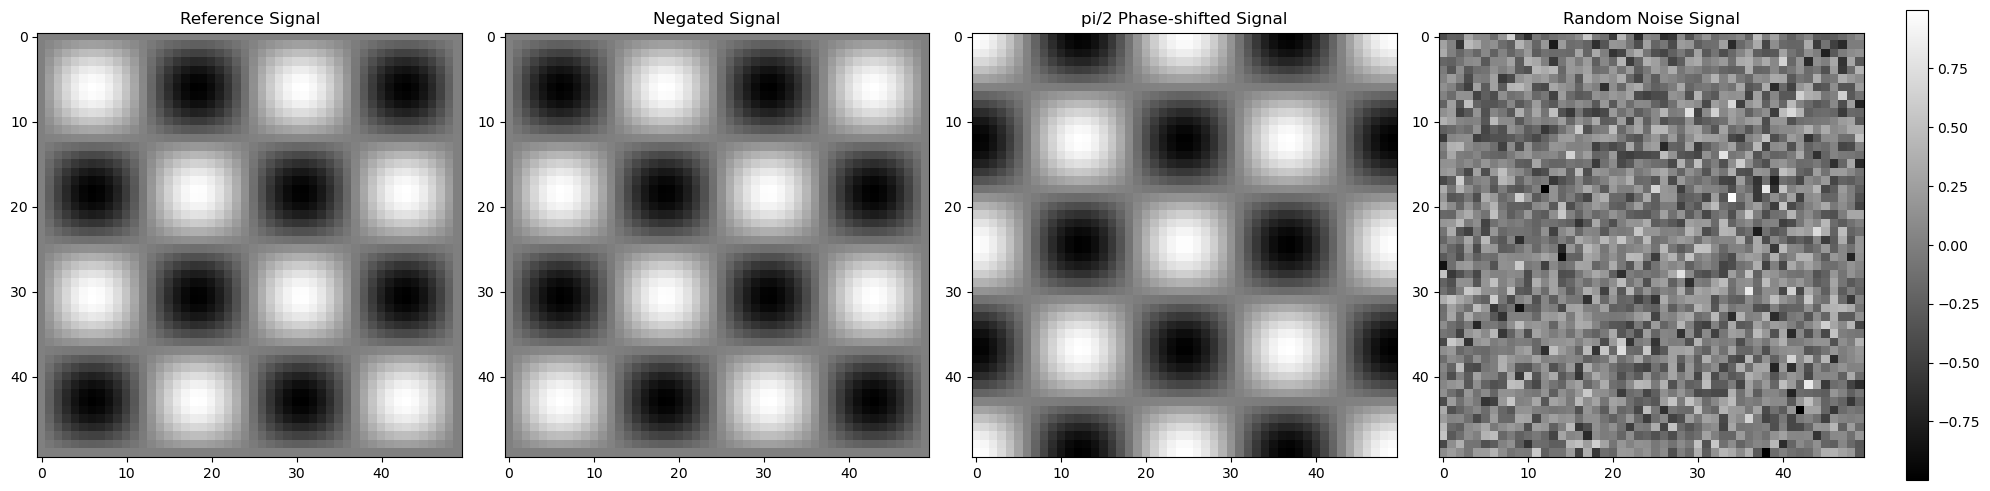

In [26]:
# Create 2D examples
def create_2d_sine(x, y, amplitude=1, phase=0):
    return amplitude * np.sin(x + phase) * np.sin(y + phase)

# Create 2D grid
x_2d = np.linspace(0, 4*np.pi, 50)
y_2d = np.linspace(0, 4*np.pi, 50)
X, Y = np.meshgrid(x_2d, y_2d)

# Create different 2D test cases
reference_2d = create_2d_sine(X, Y)
test_2d_identical = reference_2d.copy()
test_2d_negated = -reference_2d
test_2d_half_shifted = create_2d_sine(X, Y, phase=np.pi/2)
test_2d_quarted_shifted = create_2d_sine(X, Y, phase=np.pi/4)
test_2d_noise = np.random.randn(50, 50)
# Create visualization
fig = plt.figure(figsize=(20, 5))

# Create a grid of subplots with space for colorbar
gs = GridSpec(1, 5, width_ratios=[1, 1, 1, 1, 0.05])

# Plot reference signal
ax1 = plt.subplot(gs[0])
im1 = ax1.imshow(reference_2d, cmap='gray')
ax1.set_title('Reference Signal')

# Plot negated signal
ax2 = plt.subplot(gs[1])
im2 = ax2.imshow(test_2d_negated, cmap='gray')
ax2.set_title('Negated Signal')

# Plot shifted signal
ax3 = plt.subplot(gs[2])
im3 = ax3.imshow(test_2d_half_shifted, cmap='gray')
ax3.set_title('pi/2 Phase-shifted Signal')

# Plot noise signal
ax4 = plt.subplot(gs[3])
im4 = ax4.imshow(test_2d_noise, cmap='gray')
ax4.set_title('Random Noise Signal')

# Add shared colorbar
cax = plt.subplot(gs[4])
plt.colorbar(im1, cax=cax)

plt.tight_layout()
plt.show()


In [28]:
#Calculate SSIM values for 2D cases
ssim_2d_identical = ssim(reference_2d, test_2d_identical, data_range=2)
ssim_2d_negated = ssim(reference_2d, test_2d_negated, data_range=2) 
ssim_2d_half_shifted = ssim(reference_2d, test_2d_half_shifted, data_range=2)
ssim_2d_quarted_shifted = ssim(reference_2d, test_2d_quarted_shifted, data_range=2)
ssim_2d_noise = ssim(reference_2d, test_2d_noise, data_range=2)

print(f"SSIM for identical patterns: {ssim_2d_identical:.3f}")
print(f"SSIM for negated patterns: {ssim_2d_negated:.3f}")
print(f"SSIM for half phase shifted patterns: {ssim_2d_half_shifted:.3f}")
print(f"SSIM for quarter phase shifted patterns: {ssim_2d_quarted_shifted:.3f}")
print(f"SSIM for noise patterns: {ssim_2d_noise:.3f}")




SSIM for identical patterns: 1.000
SSIM for negated patterns: 0.900
SSIM for half phase shifted patterns: -0.184
SSIM for quarter phase shifted patterns: -0.005
SSIM for noise patterns: -0.006


## SSIM Equation
## The Structural Similarity Index (SSIM) between two images x and y is defined as:
##
## $SSIM(x,y) = \frac{[2\mu_x\mu_y + C_1][2\sigma_{xy} + C_2]}{[\mu_x^2 + \mu_y^2 + C_1][\sigma_x^2 + \sigma_y^2 + C_2]}$
##
## where:
## $\mu_x, \mu_y$ = mean intensity of x and y
## $\sigma_x, \sigma_y$ = standard deviation of x and y (calculated over a sliding NxN window, typically 11x11 pixels)
## $\sigma_{xy}$ = covariance between x and y (computed using the same sliding window, moving pixel-by-pixel across the image)
## $C_1, C_2$ = constants to avoid division by zero


In [29]:
# Calculate Pearson correlation coefficients
pearson_identical = np.corrcoef(reference_2d.flatten(), test_2d_identical.flatten())[0,1]
pearson_negated = np.corrcoef(reference_2d.flatten(), test_2d_negated.flatten())[0,1]
pearson_half_shifted = np.corrcoef(reference_2d.flatten(), test_2d_half_shifted.flatten())[0,1]
pearson_quarted_shifted = np.corrcoef(reference_2d.flatten(), test_2d_quarted_shifted.flatten())[0,1]
pearson_noise = np.corrcoef(reference_2d.flatten(), test_2d_noise.flatten())[0,1]

print(f"Pearson coefficient for identical patterns: {pearson_identical:.3f}")
print(f"Pearson coefficient for negated patterns: {pearson_negated:.3f}") 
print(f"Pearson coefficient for half phase shifted patterns: {pearson_half_shifted:.3f}")
print(f"Pearson coefficient for quarter phase shifted patterns: {pearson_quarted_shifted:.3f}")
print(f"Pearson coefficient for noise patterns: {pearson_noise:.3f}")


Pearson coefficient for identical patterns: 1.000
Pearson coefficient for negated patterns: -1.000
Pearson coefficient for half phase shifted patterns: -0.000
Pearson coefficient for quarter phase shifted patterns: 0.490
Pearson coefficient for noise patterns: -0.010


## Pearson Correlation Coefficient
## The Pearson correlation coefficient between two variables x and y is defined as:
##
## $r_{xy} = \frac{\sum_{i=1}^{n} (x_i - \mu_x)(y_i - \mu_y)}{\sqrt{\sum_{i=1}^{n} (x_i - \mu_x)^2} \sqrt{\sum_{i=1}^{n} (y_i - \mu_y)^2}}$
## 
## $r_{xy} = \frac{\sigma_{xy}}{\sigma_x \sigma_y}$
##
## where:
## $x_i, y_i$ = individual values of variables x and y
## $\mu_x, \mu_y$ = mean values of x and y
## $\sigma_x, \sigma_y$ = standard deviation of x and y, calculated over a flattened image
## $\sigma_{xy}$ = covariance between x and y, calcluated over a flattened image.


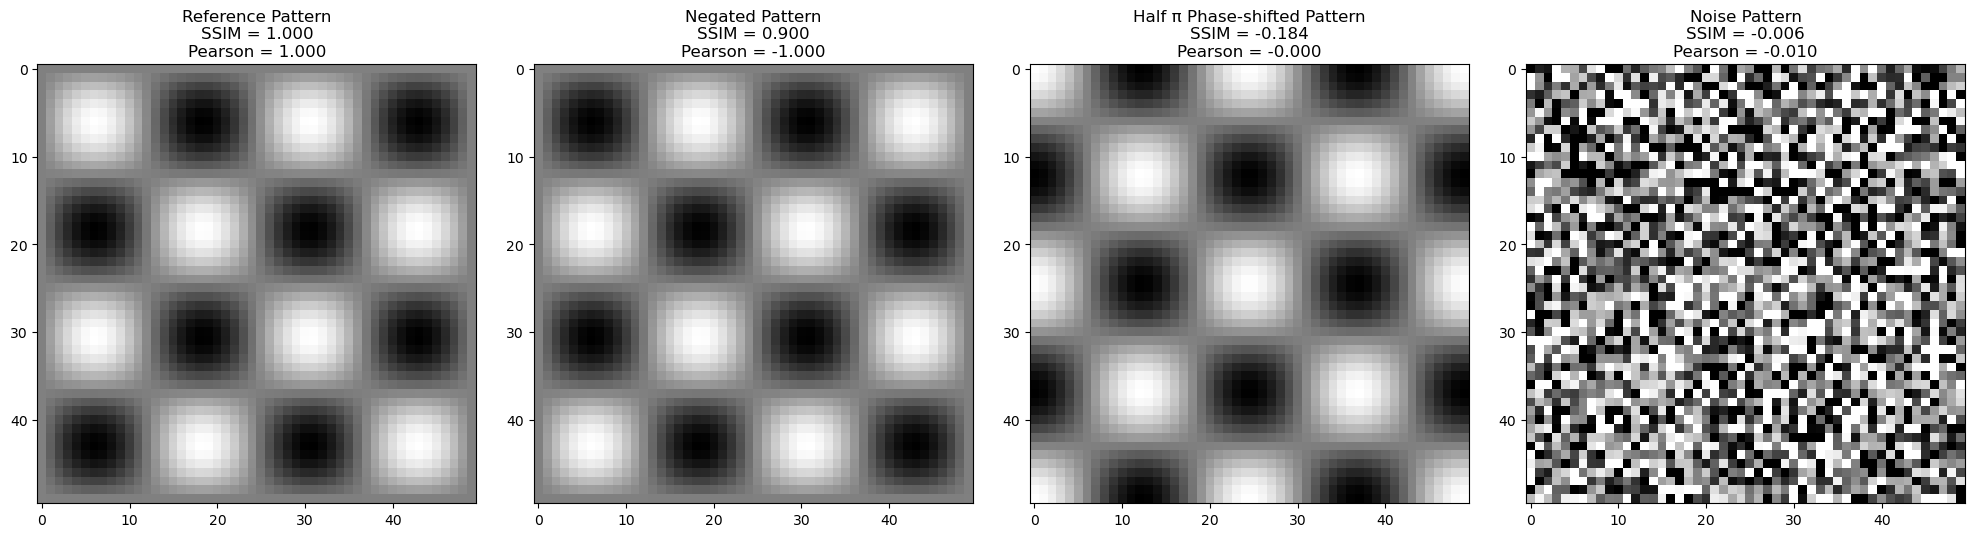

In [30]:
# Create 2D visualization
plt.figure(figsize=(20, 5))

# Plot 2D examples
plt.subplot(141)
plt.imshow(reference_2d, cmap='grey', vmin=-1, vmax=1)
plt.title('Reference Pattern\n' + 
         f'SSIM = {ssim_2d_identical:.3f}\n' +
         f'Pearson = {pearson_identical:.3f}')

plt.subplot(142)
plt.imshow(test_2d_negated, cmap='grey', vmin=-1, vmax=1)
plt.title('Negated Pattern\n' +
         f'SSIM = {ssim_2d_negated:.3f}\n' +
         f'Pearson = {pearson_negated:.3f}')

plt.subplot(143)
plt.imshow(test_2d_half_shifted, cmap='grey', vmin=-1, vmax=1)
plt.title('Half π Phase-shifted Pattern\n' +
         f'SSIM = {ssim_2d_half_shifted:.3f}\n' +
         f'Pearson = {pearson_half_shifted:.3f}')

plt.subplot(144)
plt.imshow(test_2d_noise, cmap='grey', vmin=-1, vmax=1)
plt.title('Noise Pattern\n' +
         f'SSIM = {ssim_2d_noise:.3f}\n' +
         f'Pearson = {pearson_noise:.3f}')

plt.tight_layout()


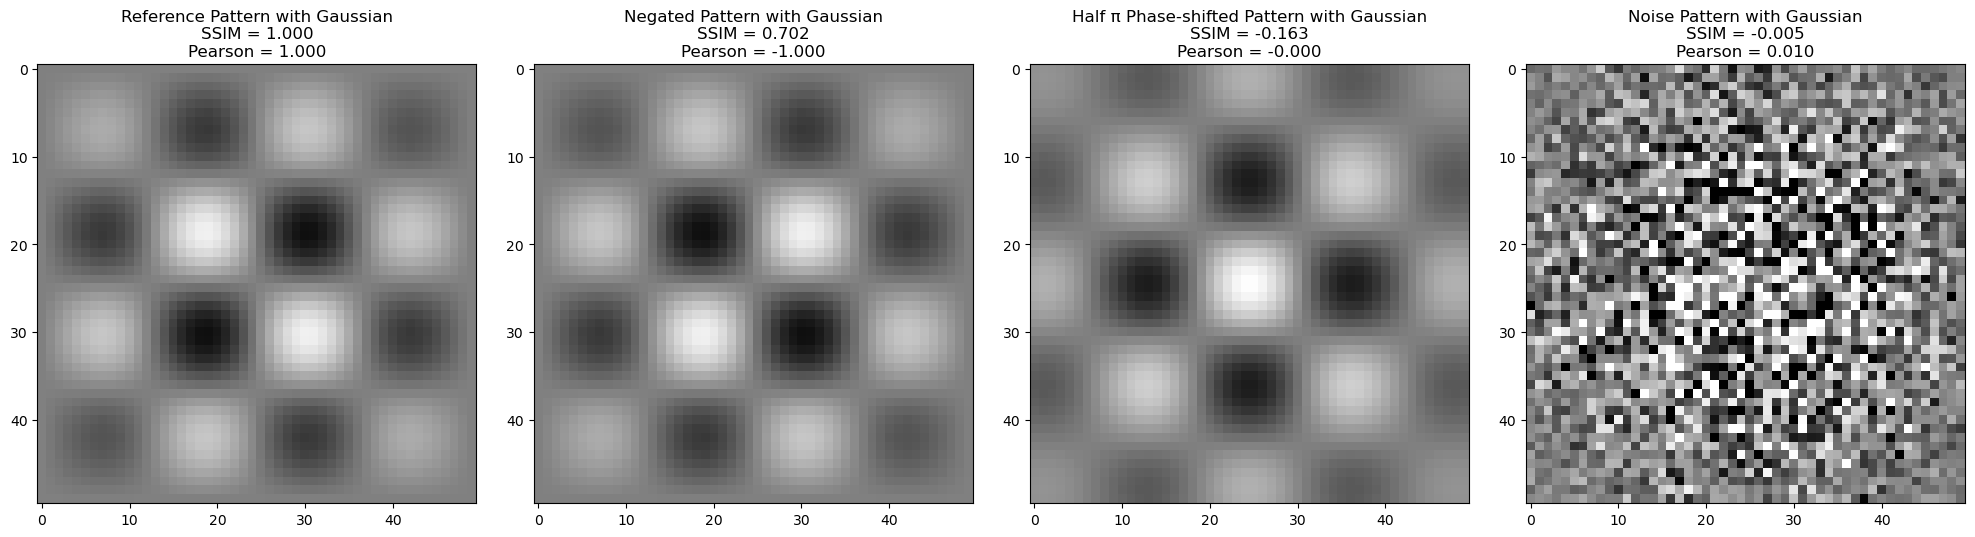

In [34]:
# Create Gaussian envelope
x = np.linspace(-1, 1, reference_2d.shape[1])
y = np.linspace(-1, 1, reference_2d.shape[0])
X, Y = np.meshgrid(x, y)
gaussian = np.exp(-(X**2 + Y**2)/1.0)  # Increased variance from 0.5 to 2.0 to make broader

# Apply Gaussian envelope to all patterns
reference_2d_gaussian = reference_2d * gaussian
test_2d_negated_gaussian = test_2d_negated * gaussian 
test_2d_half_shifted_gaussian = test_2d_half_shifted * gaussian
test_2d_noise_gaussian = test_2d_noise * gaussian

# Calculate new SSIM and Pearson values
# Add data_range parameter for floating point images
data_range = 2.0  # Range is [-1, 1] so max - min = 2
ssim_2d_identical_gaussian = ssim(reference_2d_gaussian, reference_2d_gaussian, data_range=data_range)
ssim_2d_negated_gaussian = ssim(reference_2d_gaussian, test_2d_negated_gaussian, data_range=data_range)
ssim_2d_half_shifted_gaussian = ssim(reference_2d_gaussian, test_2d_half_shifted_gaussian, data_range=data_range)
ssim_2d_noise_gaussian = ssim(reference_2d_gaussian, test_2d_noise_gaussian, data_range=data_range)

pearson_identical_gaussian = pearsonr(reference_2d_gaussian.flatten(), reference_2d_gaussian.flatten())[0]
pearson_negated_gaussian = pearsonr(reference_2d_gaussian.flatten(), test_2d_negated_gaussian.flatten())[0]
pearson_half_shifted_gaussian = pearsonr(reference_2d_gaussian.flatten(), test_2d_half_shifted_gaussian.flatten())[0]
pearson_noise_gaussian = pearsonr(reference_2d_gaussian.flatten(), test_2d_noise_gaussian.flatten())[0]

# Create 2D visualization with Gaussian envelope
plt.figure(figsize=(20, 5))

# Plot 2D examples with Gaussian envelope
plt.subplot(141)
plt.imshow(reference_2d_gaussian, cmap='grey', vmin=-1, vmax=1)
plt.title('Reference Pattern with Gaussian\n' + 
         f'SSIM = {ssim_2d_identical_gaussian:.3f}\n' +
         f'Pearson = {pearson_identical_gaussian:.3f}')

plt.subplot(142)
plt.imshow(test_2d_negated_gaussian, cmap='grey', vmin=-1, vmax=1)
plt.title('Negated Pattern with Gaussian\n' +
         f'SSIM = {ssim_2d_negated_gaussian:.3f}\n' +
         f'Pearson = {pearson_negated_gaussian:.3f}')

plt.subplot(143)
plt.imshow(test_2d_half_shifted_gaussian, cmap='grey', vmin=-1, vmax=1)
plt.title('Half π Phase-shifted Pattern with Gaussian\n' +
         f'SSIM = {ssim_2d_half_shifted_gaussian:.3f}\n' +
         f'Pearson = {pearson_half_shifted_gaussian:.3f}')

plt.subplot(144)
plt.imshow(test_2d_noise_gaussian, cmap='grey', vmin=-1, vmax=1)
plt.title('Noise Pattern with Gaussian\n' +
         f'SSIM = {ssim_2d_noise_gaussian:.3f}\n' +
         f'Pearson = {pearson_noise_gaussian:.3f}')

plt.tight_layout()
